In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('./train.csv')
#pd.set_option('display.max_rows', None)

In [3]:
#dados.head()

In [4]:
#dados.tail()

In [5]:
#dados.info()

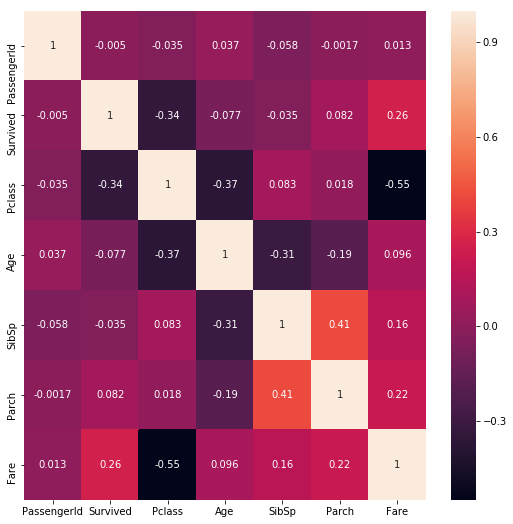

In [6]:
plt.figure(figsize = (9,9))
sns.heatmap(dados.corr(),annot = True)

In [7]:
dados = dados.drop(['Name','Parch','Ticket','Cabin',"Embarked"],axis =1)

In [8]:
dados = dados.drop(['SibSp'],axis=1)

In [9]:
dados.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
5,6,0,3,male,NaN,8.4583
6,7,0,1,male,54.0,51.8625
7,8,0,3,male,2.0,21.0750
8,9,1,3,female,27.0,11.1333
9,10,1,2,female,14.0,30.0708


In [10]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [11]:
dados['Sex'] = dados['Sex'].apply(sex)

In [12]:
dados

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500
5,6,0,3,0,NaN,8.4583
6,7,0,1,0,54.0,51.8625
7,8,0,3,0,2.0,21.0750
8,9,1,3,1,27.0,11.1333
9,10,1,2,1,14.0,30.0708


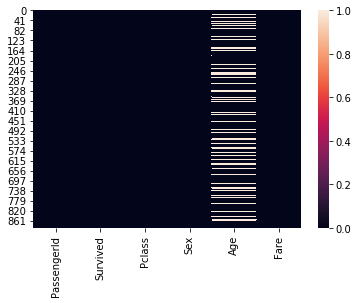

In [13]:
sns.heatmap(dados.isnull())

In [14]:
#Podemos retirar os dados que são NaN

#dados = dados.dropna().reset_index().drop('index',axis=1)

In [15]:
# tudo que for NaN vira valor Médio
def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean())
        
    else:
        return x

    
dados['Age'] = dados['Age'].apply(media_age)

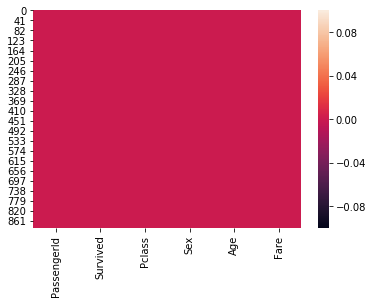

In [16]:
sns.heatmap(dados.isnull())

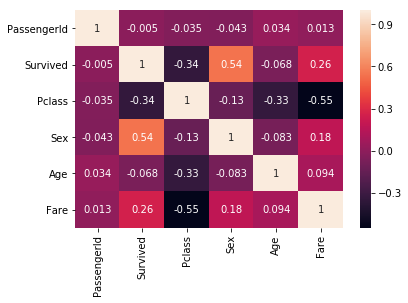

In [17]:
sns.heatmap(dados.corr(),annot = True)

In [18]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [19]:
X.shape,y.shape

((891, 5), (891, 1))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
)

In [22]:
X_train.shape,y_train.shape

((623, 5), (623, 1))

In [23]:
X_test.shape,y_test.shape

((268, 5), (268, 1))

In [54]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'sigmoid',
))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_16 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_17 (Dropout)         (None, 10)               

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs = 1000)

history.history.keys()

Train on 560 samples, validate on 63 samples
Epoch 1/1000
560/560 [==============================] - 1s 1ms/sample - loss: 0.9044 - accuracy: 0.4929 - val_loss: 0.7564 - val_accuracy: 0.5714
Epoch 2/1000
560/560 [==============================] - 0s 112us/sample - loss: 0.6782 - accuracy: 0.6196 - val_loss: 0.7092 - val_accuracy: 0.5714
Epoch 3/1000
560/560 [==============================] - 0s 152us/sample - loss: 0.6754 - accuracy: 0.6214 - val_loss: 0.6922 - val_accuracy: 0.5873
Epoch 4/1000
560/560 [==============================] - 0s 115us/sample - loss: 0.6615 - accuracy: 0.6143 - val_loss: 0.7118 - val_accuracy: 0.5714
Epoch 5/1000
560/560 [==============================] - 0s 109us/sample - loss: 0.6599 - accuracy: 0.6179 - val_loss: 0.6823 - val_accuracy: 0.5873
Epoch 6/1000
560/560 [==============================] - 0s 133us/sample - loss: 0.6641 - accuracy: 0.6268 - val_loss: 0.6890 - val_accuracy: 0.5714
Epoch 7/1000
560/560 [==============================] - 0s 136us/samp

Epoch 56/1000
560/560 [==============================] - 0s 159us/sample - loss: 0.6140 - accuracy: 0.6625 - val_loss: 0.6487 - val_accuracy: 0.6667
Epoch 57/1000
560/560 [==============================] - 0s 182us/sample - loss: 0.6054 - accuracy: 0.6821 - val_loss: 0.6380 - val_accuracy: 0.6825
Epoch 58/1000
560/560 [==============================] - 0s 198us/sample - loss: 0.6049 - accuracy: 0.6679 - val_loss: 0.6320 - val_accuracy: 0.6984
Epoch 59/1000
560/560 [==============================] - 0s 192us/sample - loss: 0.6215 - accuracy: 0.6679 - val_loss: 0.6196 - val_accuracy: 0.6825
Epoch 60/1000
560/560 [==============================] - 0s 135us/sample - loss: 0.6142 - accuracy: 0.6589 - val_loss: 0.6286 - val_accuracy: 0.6984
Epoch 61/1000
560/560 [==============================] - 0s 147us/sample - loss: 0.6235 - accuracy: 0.6446 - val_loss: 0.6294 - val_accuracy: 0.6984
Epoch 62/1000
560/560 [==============================] - 0s 110us/sample - loss: 0.6055 - accuracy: 0.6643

Epoch 111/1000
560/560 [==============================] - 0s 129us/sample - loss: 0.5911 - accuracy: 0.6750 - val_loss: 0.6135 - val_accuracy: 0.7143
Epoch 112/1000
560/560 [==============================] - 0s 126us/sample - loss: 0.5808 - accuracy: 0.6732 - val_loss: 0.6003 - val_accuracy: 0.7143
Epoch 113/1000
560/560 [==============================] - 0s 121us/sample - loss: 0.5927 - accuracy: 0.6714 - val_loss: 0.6020 - val_accuracy: 0.6984
Epoch 114/1000
560/560 [==============================] - 0s 107us/sample - loss: 0.5844 - accuracy: 0.6786 - val_loss: 0.6076 - val_accuracy: 0.6984
Epoch 115/1000
560/560 [==============================] - 0s 99us/sample - loss: 0.5949 - accuracy: 0.6982 - val_loss: 0.6043 - val_accuracy: 0.7460
Epoch 116/1000
560/560 [==============================] - 0s 112us/sample - loss: 0.5965 - accuracy: 0.6946 - val_loss: 0.6051 - val_accuracy: 0.7460
Epoch 117/1000
560/560 [==============================] - 0s 110us/sample - loss: 0.5735 - accuracy: 

Epoch 166/1000
560/560 [==============================] - 0s 103us/sample - loss: 0.5549 - accuracy: 0.6964 - val_loss: 0.5721 - val_accuracy: 0.7143
Epoch 167/1000
560/560 [==============================] - 0s 110us/sample - loss: 0.5204 - accuracy: 0.7304 - val_loss: 0.5499 - val_accuracy: 0.7302
Epoch 168/1000
560/560 [==============================] - 0s 97us/sample - loss: 0.5515 - accuracy: 0.7018 - val_loss: 0.5550 - val_accuracy: 0.7778
Epoch 169/1000
560/560 [==============================] - 0s 98us/sample - loss: 0.5347 - accuracy: 0.7179 - val_loss: 0.5562 - val_accuracy: 0.7460
Epoch 170/1000
560/560 [==============================] - 0s 125us/sample - loss: 0.5258 - accuracy: 0.7107 - val_loss: 0.5569 - val_accuracy: 0.7143
Epoch 171/1000
560/560 [==============================] - 0s 108us/sample - loss: 0.5526 - accuracy: 0.7054 - val_loss: 0.5616 - val_accuracy: 0.6984
Epoch 172/1000
560/560 [==============================] - 0s 114us/sample - loss: 0.5488 - accuracy: 0

560/560 [==============================] - 0s 101us/sample - loss: 0.5182 - accuracy: 0.7143 - val_loss: 0.5688 - val_accuracy: 0.7143
Epoch 221/1000
560/560 [==============================] - 0s 111us/sample - loss: 0.5088 - accuracy: 0.7411 - val_loss: 0.5220 - val_accuracy: 0.7937
Epoch 222/1000
560/560 [==============================] - 0s 94us/sample - loss: 0.5131 - accuracy: 0.7375 - val_loss: 0.5357 - val_accuracy: 0.7302
Epoch 223/1000
560/560 [==============================] - 0s 112us/sample - loss: 0.5223 - accuracy: 0.7411 - val_loss: 0.5379 - val_accuracy: 0.7302
Epoch 224/1000
560/560 [==============================] - 0s 94us/sample - loss: 0.5284 - accuracy: 0.7107 - val_loss: 0.5481 - val_accuracy: 0.6667
Epoch 225/1000
560/560 [==============================] - 0s 125us/sample - loss: 0.5227 - accuracy: 0.7286 - val_loss: 0.5508 - val_accuracy: 0.7460
Epoch 226/1000
560/560 [==============================] - 0s 114us/sample - loss: 0.5267 - accuracy: 0.7268 - val_los

Epoch 275/1000
560/560 [==============================] - 0s 144us/sample - loss: 0.5054 - accuracy: 0.7536 - val_loss: 0.4912 - val_accuracy: 0.7778
Epoch 276/1000
560/560 [==============================] - 0s 150us/sample - loss: 0.4764 - accuracy: 0.7500 - val_loss: 0.5483 - val_accuracy: 0.6825
Epoch 277/1000
560/560 [==============================] - 0s 158us/sample - loss: 0.4830 - accuracy: 0.7482 - val_loss: 0.5094 - val_accuracy: 0.7619
Epoch 278/1000
560/560 [==============================] - 0s 176us/sample - loss: 0.4997 - accuracy: 0.7482 - val_loss: 0.4860 - val_accuracy: 0.7778
Epoch 279/1000
560/560 [==============================] - 0s 158us/sample - loss: 0.5215 - accuracy: 0.7411 - val_loss: 0.4908 - val_accuracy: 0.7619
Epoch 280/1000
560/560 [==============================] - 0s 147us/sample - loss: 0.5037 - accuracy: 0.7464 - val_loss: 0.4814 - val_accuracy: 0.7937
Epoch 281/1000
560/560 [==============================] - 0s 127us/sample - loss: 0.5055 - accuracy:

560/560 [==============================] - 0s 163us/sample - loss: 0.4591 - accuracy: 0.7804 - val_loss: 0.5103 - val_accuracy: 0.7460
Epoch 330/1000
560/560 [==============================] - 0s 103us/sample - loss: 0.4778 - accuracy: 0.7714 - val_loss: 0.4951 - val_accuracy: 0.7619
Epoch 331/1000
560/560 [==============================] - 0s 108us/sample - loss: 0.4648 - accuracy: 0.7768 - val_loss: 0.5056 - val_accuracy: 0.7619
Epoch 332/1000
560/560 [==============================] - 0s 100us/sample - loss: 0.4758 - accuracy: 0.7768 - val_loss: 0.4847 - val_accuracy: 0.7619
Epoch 333/1000
560/560 [==============================] - 0s 120us/sample - loss: 0.4655 - accuracy: 0.7768 - val_loss: 0.4758 - val_accuracy: 0.7937
Epoch 334/1000
560/560 [==============================] - 0s 110us/sample - loss: 0.4864 - accuracy: 0.7571 - val_loss: 0.4873 - val_accuracy: 0.7619
Epoch 335/1000
560/560 [==============================] - 0s 109us/sample - loss: 0.4664 - accuracy: 0.7661 - val_l

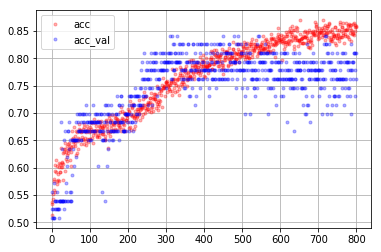

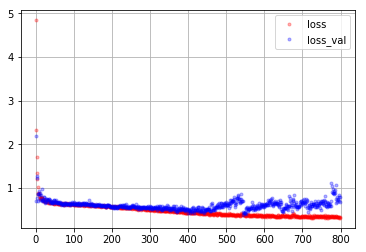

In [49]:
plt.figure()
plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
plt.legend()
plt.grid()

## PREDIÇÕES

#### Dados de Treino

In [27]:
pred_train = model.predict(X_train)
pred_train.shape

(623, 1)

In [28]:
pred_df = pd.DataFrame()
pred_df['pred'] = pred_train[:,0]
#pred_df

In [29]:
def cond(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [30]:
pred_df['pred'] = pred_df['pred'].apply(cond)

In [31]:
pred_df

,pred
0,1
1,0
2,0
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [32]:
y_train_pred = y_train.join(pred_df)

In [33]:
y_train_pred

,Survived,pred
79,1,1.0
568,0,0.0
715,0,NaN
264,0,0.0
335,0,0.0
436,0,0.0
880,1,NaN
428,0,1.0
162,0,0.0
837,0,NaN


In [34]:
k = 0
total = len(y_train_pred['pred'])

for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
    if x == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 36.6%


#### Dados de Teste

In [35]:
pred_test = model.predict(X_test)
pred_test.shape

(268, 1)

In [36]:
pred_df_test = pd.DataFrame()
pred_df_test['pred'] = pred_test[:,0]
#pred_df

In [37]:
def cond(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [38]:
pred_df_test['pred'] = pred_df_test['pred'].apply(cond)

In [39]:
pred_df_test

,pred
0,0
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [40]:
y_test_pred = y_test.join(pred_df)

In [41]:
y_test_pred

,Survived,pred
673,1,NaN
644,1,NaN
472,1,1.0
17,1,0.0
164,0,0.0
635,1,NaN
544,0,0.0
376,1,0.0
8,1,0.0
792,0,NaN


In [42]:
k = 0
total = len(y_test_pred['pred'])

for x,y in zip(y_test_pred['pred'],y_test_pred['Survived']):
    if x == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 37.31%
